In [35]:
import skfda
import numpy as np
import matplotlib.pyplot as plt

In [52]:
X = np.load("X.npy")
Y = np.load("Y.npy")

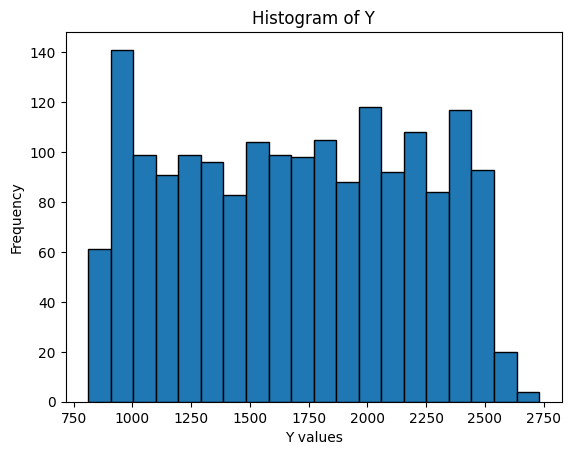

In [53]:
plt.hist(Y, bins=20, edgecolor='black')
plt.title("Histogram of Y")
plt.xlabel("Y values")
plt.ylabel("Frequency")
plt.show()

In [100]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 

# Create a pipeline with StandardScaler and SVR
svm_regressor = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.1))

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

# Train the pipeline
svm_regressor.fit(X_train, Y_train)

# Predict on the test set
Y_pred = svm_regressor.predict(X_test)

# Evaluate the model
mar = mean_absolute_error (Y_test, Y_pred)
print(f"Mean Absolute Error: {mar}")

Mean Absolute Error: 407.0141162364749


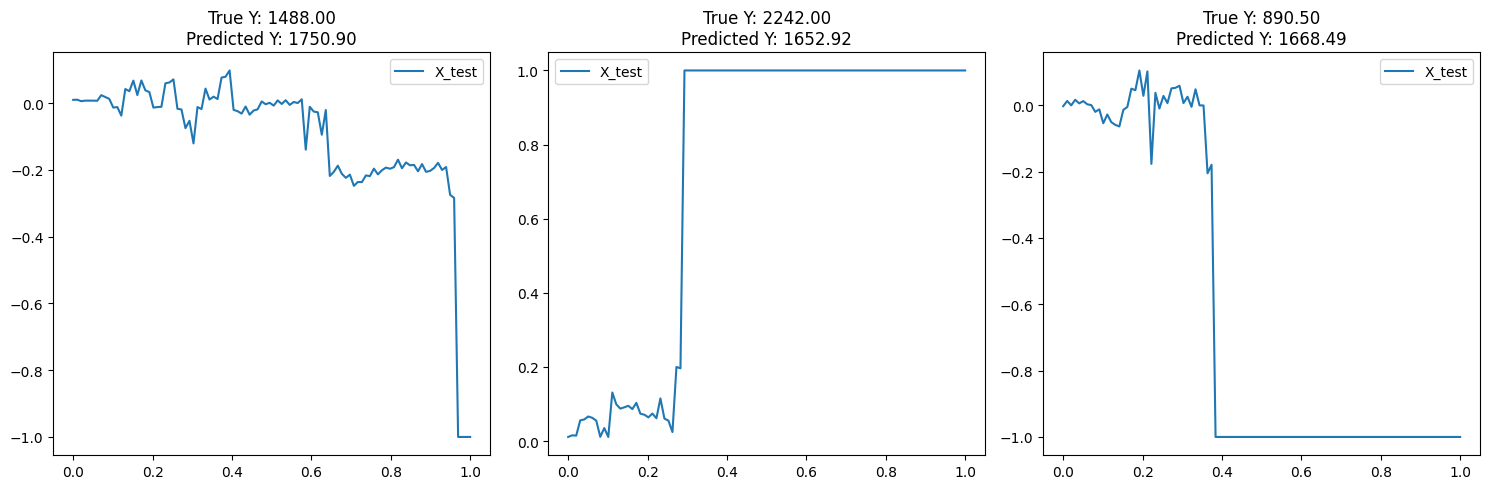

In [101]:
# Select 3 examples from the test dataset
indices = [0, 32, 352]  # You can change these indices to select different examples
examples = X_test[indices]
true_values = Y_test[indices]
predicted_values = Y_pred[indices]

# Plot the examples
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.plot(np.linspace(0, 1, examples.shape[1]), examples[i], label="X_test")
    ax.set_title(f"True Y: {true_values[i]:.2f}\nPredicted Y: {predicted_values[i]:.2f}")
    ax.legend()
plt.tight_layout()
plt.show()

In [102]:
# Filter the (x, y) pairs
filtered_indices = (Y > 2100) | (Y < 1300)
X_filtered = X[filtered_indices]
Y_filtered = Y[filtered_indices]


# Create the label variable
labels = Y_filtered > 2100

# High elo count 
count_high_elo = np.sum(labels)
print(f"Number of high elo players: {count_high_elo}")
# Low elo count
count_low_elo = np.sum(~labels)
print(f"Number of low elo players: {count_low_elo}")



Number of high elo players: 473
Number of low elo players: 494


In [103]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the filtered data into training and testing sets
X_train, X_test, labels_train, labels_test = train_test_split(
    X_filtered, labels, test_size=0.2, random_state=42
)

# Train an SVM classifier
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0))
svm_classifier.fit(X_train, labels_train)

# Predict on the test set
labels_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(labels_test, labels_pred))

              precision    recall  f1-score   support

       False       0.74      0.72      0.73        89
        True       0.77      0.78      0.77       105

    accuracy                           0.75       194
   macro avg       0.75      0.75      0.75       194
weighted avg       0.75      0.75      0.75       194



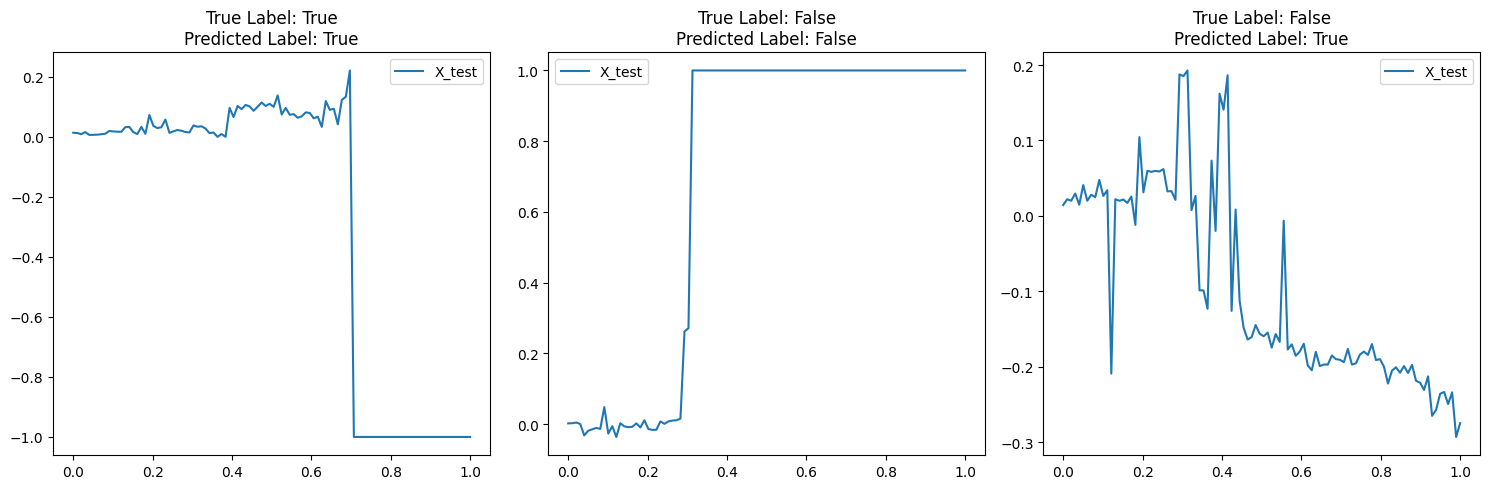

In [104]:
# Select 3 examples from the test dataset
indices = [76, 10, 50]  # You can change these indices to select different examples
examples = X_test[indices]
true_labels = labels_test[indices]
predicted_labels = labels_pred[indices]

# Plot the examples
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.plot(np.linspace(0, 1, examples.shape[1]), examples[i], label="X_test")
    ax.set_title(f"True Label: {true_labels[i]}\nPredicted Label: {predicted_labels[i]}")
    ax.legend()
plt.tight_layout()
plt.show()

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, labels_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, labels_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on the test set
labels_pred_nn = (model.predict(X_test_scaled) > 0.5).flatten()

# Evaluate the predictions
from sklearn.metrics import classification_report
print(classification_report(labels_test, labels_pred_nn))

Epoch 1/50


c:\Users\yoyom\OneDrive\Escritorio\AE\Programacion\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5311 - loss: 0.7213 - val_accuracy: 0.6065 - val_loss: 0.6502
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6793 - loss: 0.6278 - val_accuracy: 0.6710 - val_loss: 0.6419
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7395 - loss: 0.5748 - val_accuracy: 0.6774 - val_loss: 0.6268
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7372 - loss: 0.5610 - val_accuracy: 0.6903 - val_loss: 0.6126
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7725 - loss: 0.5283 - val_accuracy: 0.6839 - val_loss: 0.6154
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7703 - loss: 0.5249 - val_accuracy: 0.6710 - val_loss: 0.6106
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8060 - loss: 0.4835 - val_accuracy: 0.6516 - val_loss: 0.6015
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8228 - loss: 0.4333 - val_accuracy: 0.6516 - val_loss: 0.6156
Ep

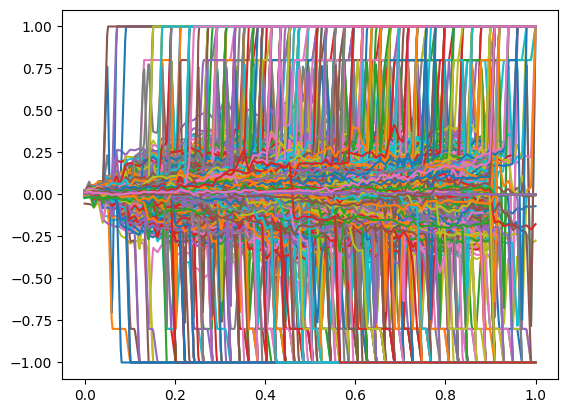

In [71]:
X_func = skfda.FDataGrid(data_matrix=X_filtered, grid_points=np.linspace(0, 1, 100), domain_range=(0, 1))
fig = X_func.plot()
plt.show()

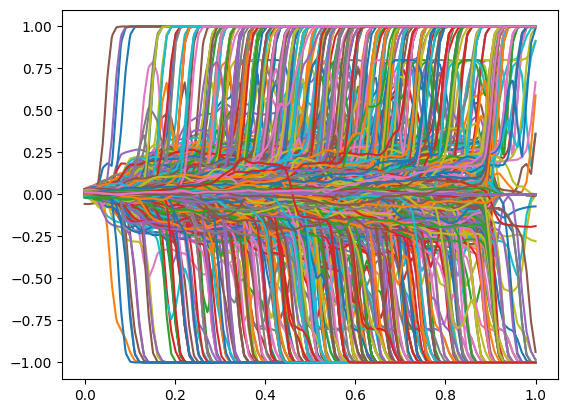

In [72]:


from skfda.preprocessing.smoothing.validation import SmoothingParameterSearch
from skfda.preprocessing.smoothing.validation import akaike_information_criterion, LinearSmootherGeneralizedCVScorer
from skfda.misc.hat_matrix import NadarayaWatsonHatMatrix
from skfda.preprocessing.smoothing import KernelSmoother

# Defining grid search
bandwidth = np.linspace(0.01, 1, 100)


# Nadaraya-Watson kernel smoother
nw = SmoothingParameterSearch(
    KernelSmoother(kernel_estimator=NadarayaWatsonHatMatrix()),
    bandwidth,
    scoring=LinearSmootherGeneralizedCVScorer(penalization_function=lambda t:1),
    param_name='kernel_estimator__bandwidth'
)


nw.fit(X_func)
x_opt = nw.transform(X_func)


fig = x_opt.plot()


plt.show()

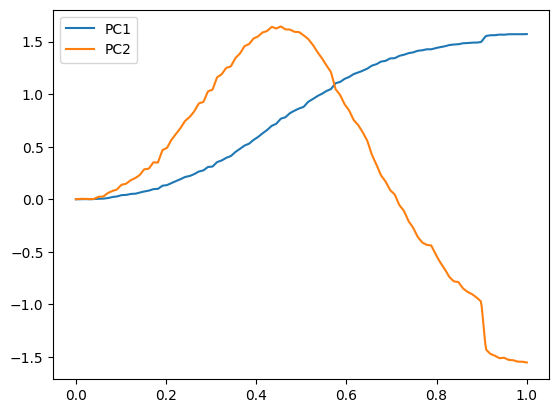

In [73]:
from skfda.preprocessing.dim_reduction import FPCA

fpca = FPCA(n_components=2)   #Definition of FPCA object
fpca.fit(X_func)             #Estimation of the principal components
fpca.components_.plot()
plt.legend(['PC1','PC2'])
plt.show()

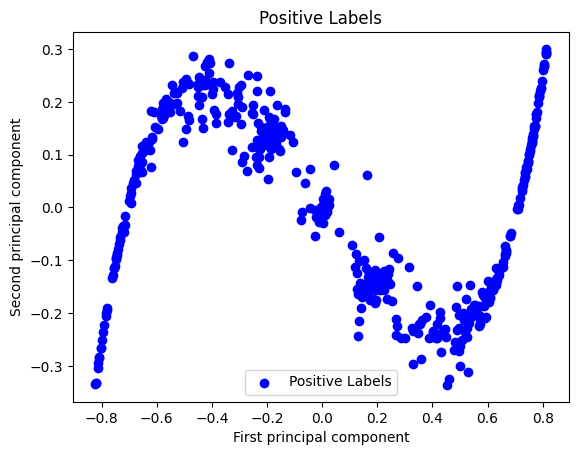

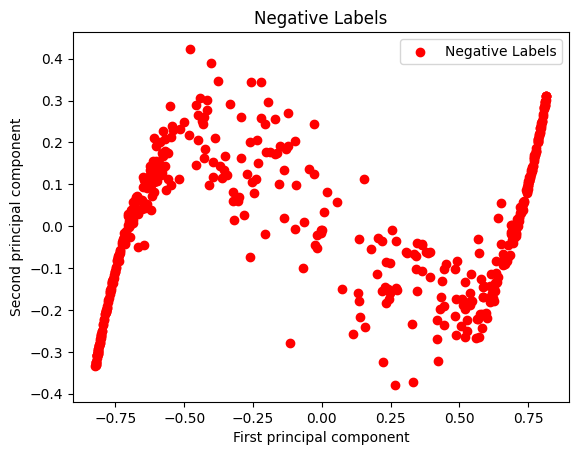

In [75]:
X_red = fpca.transform(X_func) #Pojection
# Determine colors based on labels
colors = ['blue' if label else 'red' for label in labels]


# Separate the data based on labels
X_red_positive = X_red[labels]
X_red_negative = X_red[~labels]

# Plot the points for positive labels
fig, ax = plt.subplots(1, 1)
ax.scatter(X_red_positive[:, 0], X_red_positive[:, 1], c='blue', label='Positive Labels')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_title('Positive Labels')
ax.legend()
plt.show()

# Plot the points for negative labels
fig, ax = plt.subplots(1, 1)
ax.scatter(X_red_negative[:, 0], X_red_negative[:, 1], c='red', label='Negative Labels')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_title('Negative Labels')
ax.legend()
plt.show()

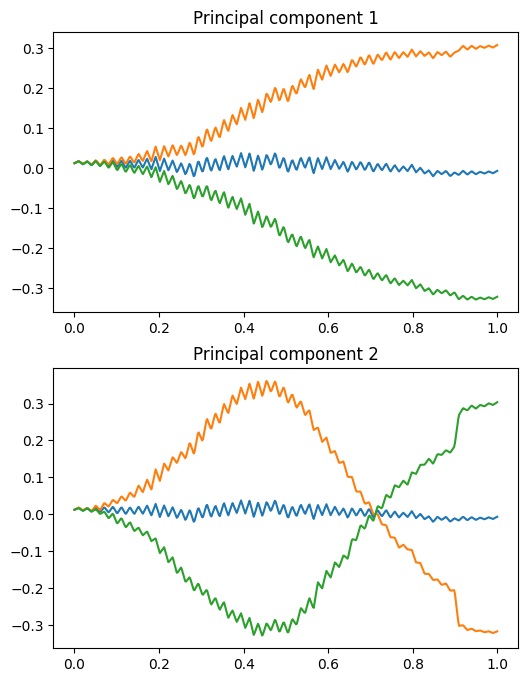

In [84]:
from skfda.exploratory.visualization import FPCAPlot
FPCAPlot(
    X_func.mean(),          #Sample mean of the original data
    fpca.components_, #Principal components
    factor=0.2,                #Scale factor to for the separation between curves.
    fig=plt.figure(figsize=(6, 2 * 4)),
    n_rows=2,
).plot()
plt.show()

In [106]:
X_test_func = skfda.FDataGrid(data_matrix=X_test, grid_points=np.linspace(0, 1, 100), domain_range=(0, 1))
X_train_func = skfda.FDataGrid(data_matrix=X_train, grid_points=np.linspace(0, 1, 100), domain_range=(0, 1))

In [170]:
import skfda.ml.classification as sc
neigh = sc.KNeighborsClassifier()
neigh.fit(X_train_func, labels_train)
labels_pred_knn = neigh.predict(X_test_func)
print(classification_report(labels_test, labels_pred_knn))



              precision    recall  f1-score   support

       False       0.72      0.52      0.60        89
        True       0.67      0.83      0.74       105

    accuracy                           0.69       194
   macro avg       0.69      0.67      0.67       194
weighted avg       0.69      0.69      0.68       194



In [171]:
neigh = sc.RadiusNeighborsClassifier()
neigh.fit(X_train_func, labels_train)
labels_pred_knn = neigh.predict(X_test_func)
print(classification_report(labels_test, labels_pred_knn))

              precision    recall  f1-score   support

       False       0.40      0.24      0.30        89
        True       0.52      0.70      0.60       105

    accuracy                           0.49       194
   macro avg       0.46      0.47      0.45       194
weighted avg       0.47      0.49      0.46       194



In [172]:
neigh = sc.NearestCentroid()
neigh.fit(X_train_func, labels_train)
labels_pred_knn = neigh.predict(X_test_func)
print(classification_report(labels_test, labels_pred_knn))

              precision    recall  f1-score   support

       False       0.49      0.49      0.49        89
        True       0.57      0.56      0.56       105

    accuracy                           0.53       194
   macro avg       0.53      0.53      0.53       194
weighted avg       0.53      0.53      0.53       194



In [174]:
neigh = sc.DTMClassifier(proportiontocut=0.25)
neigh.fit(X_train_func, labels_train)
labels_pred_knn = neigh.predict(X_test_func)
print(classification_report(labels_test, labels_pred_knn))

              precision    recall  f1-score   support

       False       0.49      0.49      0.49        89
        True       0.57      0.56      0.56       105

    accuracy                           0.53       194
   macro avg       0.53      0.53      0.53       194
weighted avg       0.53      0.53      0.53       194



In [ ]:
neigh = sc.MaximumDepthClassifier()
neigh.fit(X_train_func, labels_train)
labels_pred_knn = neigh.predict(X_test_func)
print(classification_report(labels_test, labels_pred_knn))


              precision    recall  f1-score   support

       False       0.46      1.00      0.63        89
        True       1.00      0.02      0.04       105

    accuracy                           0.47       194
   macro avg       0.73      0.51      0.34       194
weighted avg       0.75      0.47      0.31       194



c:\Users\yoyom\OneDrive\Escritorio\AE\Programacion\.venv\Lib\site-packages\skfda\preprocessing\feature_construction\_per_class_transformer.py:212: UserWarning: Parameter 'transformer' with type <class 'skfda.exploratory.depth._depth.ModifiedBandDepth'> should use the data for  fitting.It should have the 'stateless' tag set to 'False'
  warnings.warn(


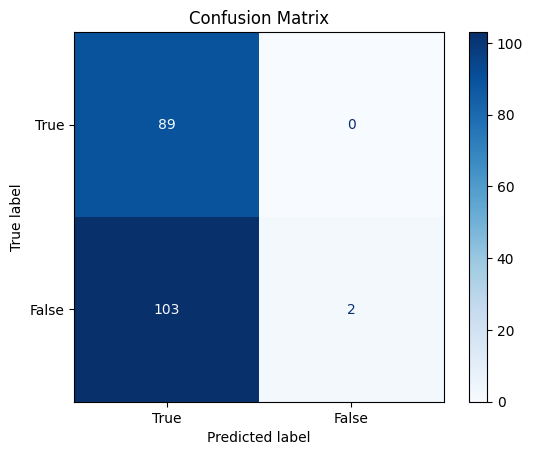

In [177]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(labels_test, labels_pred_knn)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True, False])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [178]:
neigh = sc.DDClassifier(degree=2)
neigh.fit(X_train_func, labels_train)
labels_pred_knn = neigh.predict(X_test_func)
print(classification_report(labels_test, labels_pred_knn))


KeyboardInterrupt: 

In [179]:

from skfda.exploratory.depth import (
    ModifiedBandDepth,
    IntegratedDepth,
)
from sklearn.neighbors import KNeighborsClassifier
neigh = sc.DDGClassifier(
    depth_method=ModifiedBandDepth(),
    multivariate_classifier=KNeighborsClassifier(),
)
neigh.fit(X_train_func, labels_train)
labels_pred_knn = neigh.predict(X_test_func)
print(classification_report(labels_test, labels_pred_knn))

              precision    recall  f1-score   support

       False       0.72      0.72      0.72        89
        True       0.76      0.76      0.76       105

    accuracy                           0.74       194
   macro avg       0.74      0.74      0.74       194
weighted avg       0.74      0.74      0.74       194



c:\Users\yoyom\OneDrive\Escritorio\AE\Programacion\.venv\Lib\site-packages\skfda\preprocessing\feature_construction\_per_class_transformer.py:212: UserWarning: Parameter 'transformer' with type <class 'skfda.exploratory.depth._depth.ModifiedBandDepth'> should use the data for  fitting.It should have the 'stateless' tag set to 'False'
  warnings.warn(


In [184]:
neigh = sc.LogisticRegression(max_features=10)
neigh.fit(X_train_func, labels_train)
labels_pred_knn = neigh.predict(X_test_func)
print(classification_report(labels_test, labels_pred_knn))

              precision    recall  f1-score   support

       False       0.73      0.74      0.74        89
        True       0.78      0.77      0.78       105

    accuracy                           0.76       194
   macro avg       0.76      0.76      0.76       194
weighted avg       0.76      0.76      0.76       194



In [186]:
from skfda.exploratory.stats.covariance import (
    ParametricGaussianCovariance
)
from skfda.misc.covariances import Gaussian
rbf = Gaussian(variance=6, length_scale=1)

In [187]:
neigh = sc.QuadraticDiscriminantAnalysis(
    ParametricGaussianCovariance(rbf),
    regularizer=0.05,
)
neigh.fit(X_train_func, labels_train)
labels_pred_knn = neigh.predict(X_test_func)
print(classification_report(labels_test, labels_pred_knn))

              precision    recall  f1-score   support

       False       0.70      0.45      0.55        89
        True       0.64      0.84      0.73       105

    accuracy                           0.66       194
   macro avg       0.67      0.64      0.64       194
weighted avg       0.67      0.66      0.65       194



In [139]:

pca = FPCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_func)
X_test_pca = pca.transform(X_test_func)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, labels_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, labels_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on the test set
labels_pred_nn = (model.predict(X_test_scaled) > 0.5).flatten()

# Evaluate the predictions
from sklearn.metrics import classification_report
print(classification_report(labels_test, labels_pred_nn))

Epoch 1/50


c:\Users\yoyom\OneDrive\Escritorio\AE\Programacion\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5229 - loss: 0.6949 - val_accuracy: 0.5677 - val_loss: 0.6755
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5546 - loss: 0.6717 - val_accuracy: 0.5484 - val_loss: 0.6719
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5858 - loss: 0.6583 - val_accuracy: 0.5742 - val_loss: 0.6702
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6805 - loss: 0.6428 - val_accuracy: 0.5742 - val_loss: 0.6701
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7045 - loss: 0.6365 - val_accuracy: 0.5677 - val_loss: 0.6703
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6902 - loss: 0.6274 - val_accuracy: 0.5677 - val_loss: 0.6707
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7001 - loss: 0.6195 - val_accuracy: 0.6194 - val_loss: 0.6750
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6700 - loss: 0.6237 - val_accuracy: 0.6129 - val_loss: 0.6785
Ep

In [140]:
# Train an SVM classifier
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0))
svm_classifier.fit(X_train_pca, labels_train)

# Predict on the test set
labels_pred = svm_classifier.predict(X_test_pca)

# Evaluate the classifier
print(classification_report(labels_test, labels_pred))

              precision    recall  f1-score   support

       False       0.63      0.60      0.61        89
        True       0.67      0.70      0.69       105

    accuracy                           0.65       194
   macro avg       0.65      0.65      0.65       194
weighted avg       0.65      0.65      0.65       194



In [155]:
from skfda.preprocessing.dim_reduction import FPLS

pls = FPLS().fit(X_train_func, labels_train)
X_train_pls = pls.transform(X_train_func)
X_test_pls = pls.transform(X_test_func)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pls)
X_test_scaled = scaler.transform(X_test_pls)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, labels_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, labels_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on the test set
labels_pred_nn = (model.predict(X_test_scaled) > 0.5).flatten()

# Evaluate the predictions
from sklearn.metrics import classification_report
print(classification_report(labels_test, labels_pred_nn))

Epoch 1/50


c:\Users\yoyom\OneDrive\Escritorio\AE\Programacion\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5467 - loss: 0.6800 - val_accuracy: 0.5806 - val_loss: 0.6726
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5501 - loss: 0.6797 - val_accuracy: 0.5935 - val_loss: 0.6704
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5577 - loss: 0.6756 - val_accuracy: 0.6194 - val_loss: 0.6685
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5771 - loss: 0.6720 - val_accuracy: 0.6258 - val_loss: 0.6673
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6271 - loss: 0.6656 - val_accuracy: 0.6129 - val_loss: 0.6645
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6290 - loss: 0.6637 - val_accuracy: 0.6194 - val_loss: 0.6636
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6243 - loss: 0.6580 - val_accuracy: 0.6194 - val_loss: 0.6611
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6391 - loss: 0.6556 - val_accuracy: 0.6194 - val_loss: 0.6597
Ep

In [156]:
# Train an SVM classifier
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0))
svm_classifier.fit(X_train_pls, labels_train)

# Predict on the test set
labels_pred = svm_classifier.predict(X_test_pls)

# Evaluate the classifier
print(classification_report(labels_test, labels_pred))

              precision    recall  f1-score   support

       False       0.54      0.66      0.59        89
        True       0.64      0.51      0.57       105

    accuracy                           0.58       194
   macro avg       0.59      0.59      0.58       194
weighted avg       0.59      0.58      0.58       194



[0.         0.02020202 0.03030303 0.04040404 0.05050505 0.06060606
 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111 0.12121212
 0.13131313 0.14141414 0.19191919 0.2020202  0.21212121 0.22222222
 0.24242424 0.25252525]


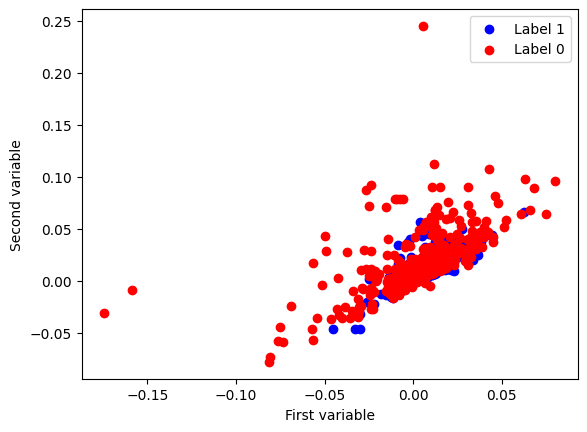

In [165]:
from skfda.preprocessing.dim_reduction import variable_selection as vs
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV 
#Variable selection
rkvs = vs.RKHSVariableSelection(n_features_to_select=20)
rkvs.fit(X_train_func, y=labels_train) 

#get the impact points
point_mask = rkvs.get_support()
points = X_func.grid_points[0][point_mask]
print(points)

#Projection and plotting
X_rkvs_train = rkvs.transform(X_train_func)
X_rkvs_test = rkvs.transform(X_test_func)
fig, ax = plt.subplots(1, 1)
ax.scatter(X_rkvs_train[labels_train, 0], X_rkvs_train[labels_train, 1], c='blue', label='Label 1')
ax.scatter(X_rkvs_train[~labels_train, 0], X_rkvs_train[~labels_train, 1], c='red', label='Label 0')
ax.set_xlabel('First variable')
ax.set_ylabel('Second variable')
ax.legend()
plt.show()



In [167]:
from sklearn.metrics import accuracy_score
#Classification
knn = KNN()
gcv = GridSearchCV(knn, {'n_neighbors':range(1,20,1)})
gcv.fit(X_rkvs_train,y=labels_train)
print('Train accuracy',"{:.4f}".format(gcv.best_score_))

# Predict on the test dataset using the best KNN model
labels_pred_test = gcv.best_estimator_.predict(X_rkvs_test)

# Calculate accuracy
test_accuracy = accuracy_score(labels_test, labels_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Train accuracy 0.7478
Test Accuracy: 0.8144


In [126]:
from skfda.preprocessing.dim_reduction.variable_selection import RecursiveMaximaHunting

# Apply Recursive Maxima Hunting
rmh = RecursiveMaximaHunting(max_features=20)
rmh.fit(X_train_func, y=labels_train)

# Get the selected points
selected_points = X_func.grid_points[0][rmh.get_support()]
print("Selected points:", selected_points)




Selected points: [0.03030303 0.04040404 0.05050505 0.06060606 0.07070707 0.08080808
 0.09090909 0.1010101  0.11111111 0.12121212 0.13131313 0.14141414
 0.15151515 0.16161616 0.17171717 0.18181818 0.19191919 0.2020202
 0.21212121 0.24242424]


In [127]:
X_rmh_train = rmh.transform(X_train_func)
X_rmh_test = rmh.transform(X_test_func)

In [128]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_rmh_train)
X_test_scaled = scaler.transform(X_rmh_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, labels_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, labels_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on the test set
labels_pred_nn = (model.predict(X_test_scaled) > 0.5).flatten()

# Evaluate the predictions
from sklearn.metrics import classification_report
print(classification_report(labels_test, labels_pred_nn))

Epoch 1/50


c:\Users\yoyom\OneDrive\Escritorio\AE\Programacion\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5806 - loss: 0.6594 - val_accuracy: 0.6516 - val_loss: 0.6247
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6958 - loss: 0.6078 - val_accuracy: 0.6581 - val_loss: 0.6089
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7805 - loss: 0.6022 - val_accuracy: 0.6839 - val_loss: 0.5913
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7886 - loss: 0.5547 - val_accuracy: 0.6968 - val_loss: 0.5769
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7841 - loss: 0.5201 - val_accuracy: 0.7097 - val_loss: 0.5699
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7585 - loss: 0.5048 - val_accuracy: 0.7032 - val_loss: 0.5634
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7757 - loss: 0.4873 - val_accuracy: 0.7097 - val_loss: 0.5614
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7949 - loss: 0.4451 - val_accuracy: 0.7097 - val_loss: 0.5589
Ep

In [134]:
# Train an SVM classifier
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0))
svm_classifier.fit(X_rmh_train, labels_train)

# Predict on the test set
labels_pred = svm_classifier.predict(X_rmh_test)

# Evaluate the classifier
print(classification_report(labels_test, labels_pred))

              precision    recall  f1-score   support

       False       0.87      0.78      0.82        89
        True       0.83      0.90      0.86       105

    accuracy                           0.85       194
   macro avg       0.85      0.84      0.84       194
weighted avg       0.85      0.85      0.84       194

